# 4 Final Project Submission

* name: Leticia D Drasler
* pace: Part time
* Scheduled project review data/time: January th, 2022,  AM (Mountain Time)
* Course Instructor: Abhineet
* Blog post URL:
* GitHub repository:

### Importing Packages

In [29]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers

### Open the directories

In [30]:
train_directory='chest_xray\\train'
val_directory='chest_xray\\val'
test_directory='chest_xray\\test'

# using image_dataset_from_directory
# to find out how many files and classes the dataset has

train_data=image_dataset_from_directory(train_directory,color_mode="grayscale")
val_data=image_dataset_from_directory(val_directory,color_mode="grayscale")
test_data=image_dataset_from_directory(test_directory,color_mode="grayscale")

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


#### Plotting random images from our train data file

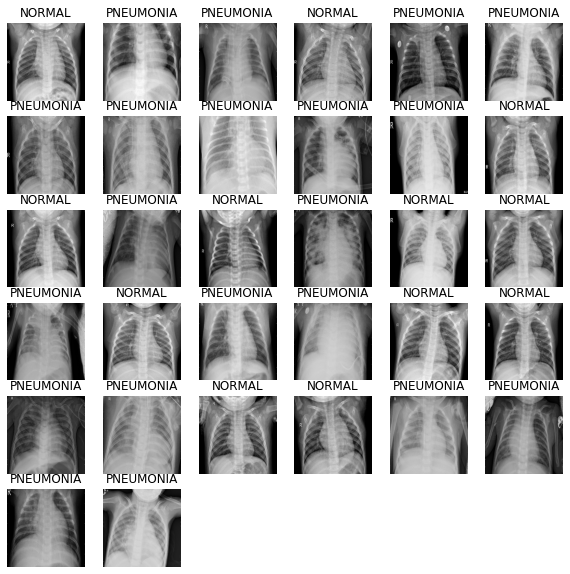

In [31]:
plt.figure(figsize=(10, 10))
class_names = train_data.class_names
for images, labels in train_data.take(1):
    for i in range(len(images)):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Baseline Fully Connected Neural Network

In [32]:
inputs = keras.Input(shape=(256, 256, 1)) 
x = layers.Rescaling(1./255)(inputs)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_baseline = keras.Model(inputs=inputs, outputs=outputs)

model_baseline.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [33]:
callbacks_baseline = [
 keras.callbacks.ModelCheckpoint(
 filepath="baseline_model.keras",
 save_best_only=True,
 monitor="val_loss")
]

history_baseline = model_baseline.fit(
 train_data,
 epochs=15,
 validation_data=val_data,
 callbacks=callbacks_baseline)

Epoch 1/15
163/163 [==============================] - 36s 208ms/step - loss: 3.2191 - accuracy: 0.7682 - val_loss: 1.2301 - val_accuracy: 0.6875
Epoch 2/15
163/163 [==============================] - 23s 135ms/step - loss: 2.0088 - accuracy: 0.8405 - val_loss: 8.5272 - val_accuracy: 0.5000
Epoch 3/15
163/163 [==============================] - 20s 119ms/step - loss: 1.6280 - accuracy: 0.8668 - val_loss: 4.4576 - val_accuracy: 0.6875
Epoch 4/15
163/163 [==============================] - 20s 120ms/step - loss: 1.4851 - accuracy: 0.8819 - val_loss: 7.0032 - val_accuracy: 0.5625
Epoch 5/15
163/163 [==============================] - 21s 120ms/step - loss: 1.4487 - accuracy: 0.8873 - val_loss: 4.3907 - val_accuracy: 0.6250
Epoch 6/15
163/163 [==============================] - 20s 120ms/step - loss: 1.1098 - accuracy: 0.9005 - val_loss: 7.9163 - val_accuracy: 0.5625
Epoch 7/15
163/163 [==============================] - 21s 120ms/step - loss: 1.1977 - accuracy: 0.9030 - val_loss: 11.3975 - val_a

In [34]:
#plot_hist(history_baseline)

In [36]:
test_loss, test_acc = model_baseline.evaluate(test_data) 
print(f"Test accuracy: {test_acc:.3f}")

20/20 [==============================] - 2s 54ms/step - loss: 1.7359 - accuracy: 0.8285
Test accuracy: 0.829


The simple Neural Network does not have a great performance because 

### Convoluntional Neural Network

In [37]:
# adding data augmentation to help the model not to overfit

data_augmentation = keras.Sequential(
 [
     layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1),
 ]
)

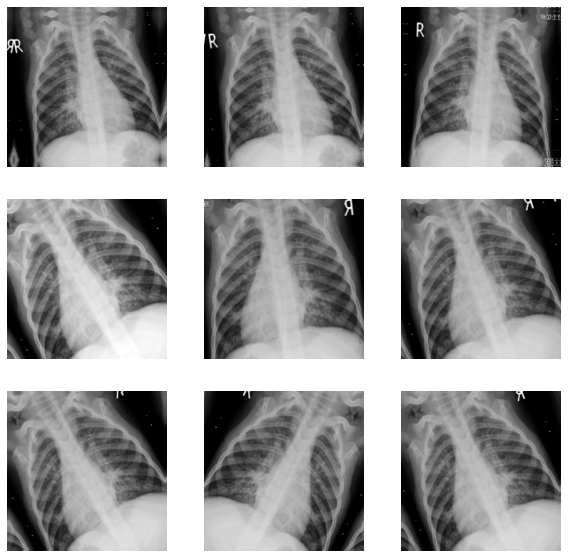

In [38]:
plt.figure(figsize=(10, 10)) 
for images, _ in train_data.take(1): 
    for i in range(9):
        augmented_images = data_augmentation(images) 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"),cmap='gray') 
        plt.axis("off")

In [39]:
inputs = keras.Input(shape=(256, 256, 1))

# adding data_augmentation to prevent overfitting
x = data_augmentation(inputs)

# first convoluntional layer
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)

# second convoluntional layer
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

# third convoluntional layer
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# fourth convoluntional layer
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# fifth convoluntional layer
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# flatten
x = layers.Flatten()(x)

# dropout to prevent overfitting 

x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model_3 = keras.Model(inputs=inputs, outputs=outputs)
model_3.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

In [40]:
callbacks_3 = [
 keras.callbacks.ModelCheckpoint(
     filepath='x_ray_covn_model_NN.{epoch:02d}.hdf5',
     save_best_only=False,
     monitor="val_loss")
]

In [13]:
history_3 = model_3.fit(
 train_data,
 epochs=25,
 validation_data=val_data,
 callbacks=callbacks_3)

Epoch 1/25
163/163 [==============================] - 309s 2s/step - loss: 0.6774 - accuracy: 0.7326 - val_loss: 0.6326 - val_accuracy: 0.5625
Epoch 2/25
163/163 [==============================] - 317s 2s/step - loss: 0.3661 - accuracy: 0.8612 - val_loss: 1.6424 - val_accuracy: 0.5625
Epoch 3/25
163/163 [==============================] - 335s 2s/step - loss: 0.2545 - accuracy: 0.9105 - val_loss: 0.6863 - val_accuracy: 0.6875
Epoch 4/25
163/163 [==============================] - 348s 2s/step - loss: 0.2082 - accuracy: 0.9264 - val_loss: 0.7599 - val_accuracy: 0.6875
Epoch 5/25
163/163 [==============================] - 357s 2s/step - loss: 0.1883 - accuracy: 0.9308 - val_loss: 0.8488 - val_accuracy: 0.6875
Epoch 6/25
163/163 [==============================] - 352s 2s/step - loss: 0.1661 - accuracy: 0.9450 - val_loss: 0.6040 - val_accuracy: 0.6250
Epoch 7/25
163/163 [==============================] - 343s 2s/step - loss: 0.1624 - accuracy: 0.9411 - val_loss: 0.7149 - val_accuracy: 0.6875

In [18]:
accuracy = history_3.history["accuracy"]
val_accuracy = history_3.history["val_accuracy"]
loss = history_3.history["loss"]
val_loss = history_3.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
# plt.xlim([1, 25])
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
# plt.xlim([1, 25])

plt.show()

NameError: name 'history_3' is not defined

In [41]:
test_model_03 = keras.models.load_model("x_ray_covn_model_NN.23.hdf5")
test_loss, test_acc = test_model_03.evaluate(test_data) 
print(f"Test accuracy: {test_acc:.3f}")

20/20 [==============================] - 20s 899ms/step - loss: 0.4624 - accuracy: 0.8526
Test accuracy: 0.853


In [42]:
test_model_03.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 1)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                           

### LIME PACKAGE

In [43]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [44]:
data=image_dataset_from_directory(train_directory)


Found 5216 files belonging to 2 classes.


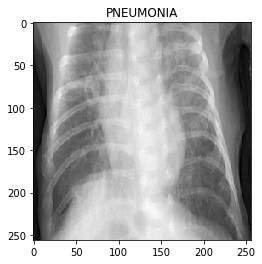

In [45]:
# from skimage.color import gray2rgb
data =list(train_data.take(1))
image = data[0][0][4].numpy().astype(np.uint8)
label=data[0][1][4].numpy()
class_names = train_data.class_names

from matplotlib import pyplot as plt
plt.imshow(image.reshape(256,256), interpolation='nearest',cmap='gray')
plt.title(class_names[label])
# plt.imshow(image_color, interpolation='nearest')
plt.show()

In [46]:
def reshape_img(image):
    return image.reshape(256,256)

def new_predict_fn(images):
    images=images[:,:,:,:1]
    return test_model_03.predict(images)

explanation = explainer.explain_instance(image.reshape(256,256), 
                                         new_predict_fn,  
                                         top_labels=2, hide_color=0,
                                         num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

(-0.5, 255.5, 255.5, -0.5)

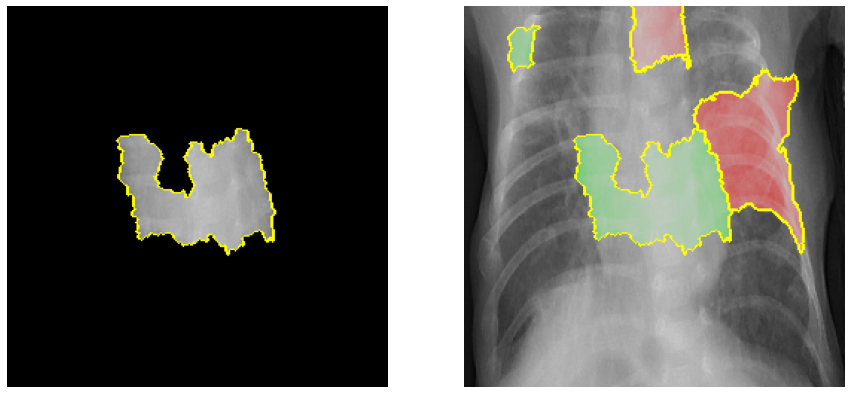

In [47]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True,
                                                num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False,
                                                num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1.astype('uint8'), mask_1))
ax2.imshow(mark_boundaries(temp_2.astype('uint8'), mask_2))
ax1.axis('off')
ax2.axis('off')

this end